In [1]:
import numpy as np

from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical 

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [4]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [5]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


Example training images and their labels: [6, 9, 9, 4, 1]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile']


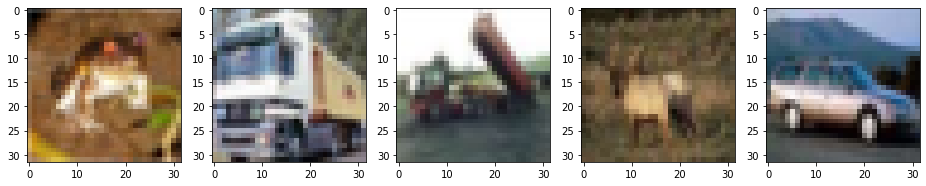

In [6]:
import matplotlib.pyplot as plt

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:5]])) 
print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in y_train[0:5]]))

f, axarr = plt.subplots(1, 5)
f.set_size_inches(16, 6)

for i in range(5):
    img = X_train[i]
    axarr[i].imshow(img)
plt.show()

In [7]:
# Transform label indices to one-hot encoded vectors

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)

X_train = np.reshape(X_train,(50000,3072))
X_test = np.reshape(X_test,(10000,3072))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalization of pixel values (to [0-1] range)

X_train /= 255
X_test /= 255

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=3072))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [9]:
history = model.fit(X_train,y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2)


Epoch 1/10
1250/1250 [==============================] - 23s 18ms/step - loss: 1.8323 - accuracy: 0.3366 - val_loss: 1.7905 - val_accuracy: 0.3558
Epoch 2/10
1250/1250 [==============================] - 16s 13ms/step - loss: 1.6661 - accuracy: 0.3997 - val_loss: 1.6490 - val_accuracy: 0.4131
Epoch 3/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.5911 - accuracy: 0.4273 - val_loss: 1.6264 - val_accuracy: 0.4258
Epoch 4/10
1250/1250 [==============================] - 12s 9ms/step - loss: 1.5474 - accuracy: 0.4478 - val_loss: 1.6214 - val_accuracy: 0.4177
Epoch 5/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.5143 - accuracy: 0.4578 - val_loss: 1.6045 - val_accuracy: 0.4218
Epoch 6/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.4869 - accuracy: 0.4676 - val_loss: 1.5375 - val_accuracy: 0.4620
Epoch 7/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.4608 - accuracy: 0.4768 - val_loss: 1.5600 - val_

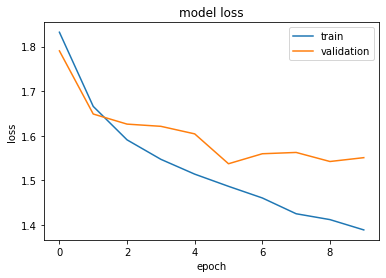

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [11]:
# Evaluating the MLP
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [12]:
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[1.5082801580429077, 0.4618000090122223]


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

#Predict
y_prediction = model.predict(X_test)
y_prediction = np.argmax (y_prediction, axis = 1)
y_test=np.argmax(y_test, axis=1)


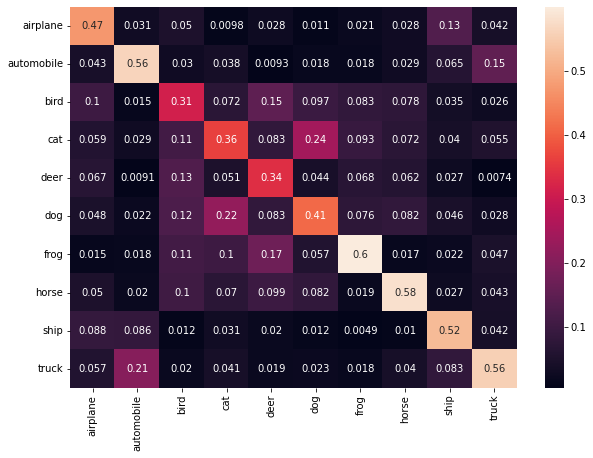

In [14]:
#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test, y_prediction , normalize='pred')
df_cm = pd.DataFrame(result, index = [i for i in cifar_classes],
                  columns = [i for i in cifar_classes])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)